# <span style='font-family:"Roboto"'>**SUICIDE RATES OVERVIEW | 1985 TO 2016**

<span style='font-family:"Roboto"'> This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

## <span style='font-family:"Roboto"'> **EXPLORATORY DATA ANALYSIS**

### <span style='font-family:"Roboto"'> **Data Preparation and Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv("./data/Suicide_Rates_Overview_1985_to_2016.csv")

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.rename({' gdp_for_year ($ ) ' : 'gdp_for_year', 'gdp_per_capita ($)' : 'gdp_per_capita', 'country-year' : 'country_year'}, axis=1, inplace=True)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country_year,HDI for year,gdp_for_year ($),gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country_year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita', 'generation'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country_year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita      27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
df.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


### <span style='font-family:"Roboto"'> **Visualization**

<span style='font-family:"Roboto"'> **Plot the correlation**

Text(0.5, 1.0, 'Correlation Heatmap')

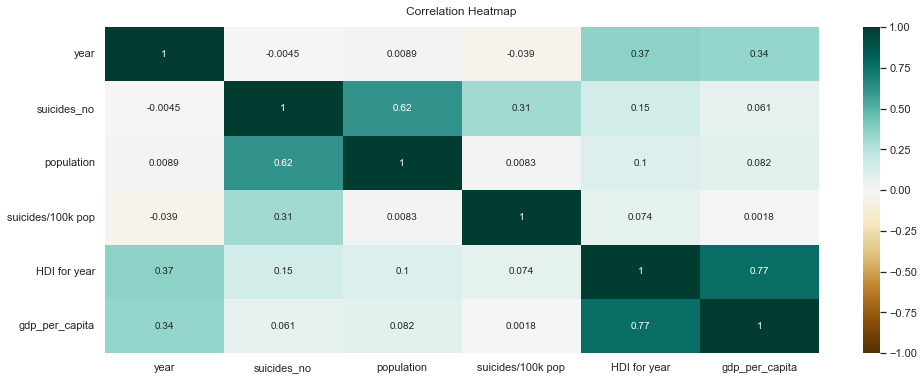

In [9]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax= 1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [10]:
df.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [11]:
df.suicides_no.value_counts()

0       4281
1       1539
2       1102
3        867
4        696
        ... 
2158       1
525        1
2297       1
5241       1
2872       1
Name: suicides_no, Length: 2084, dtype: int64

In [12]:
missing_percentages = df.isna().sum().sort_values(ascending= False) / len(df)
missing_percentages

HDI for year          0.699353
country               0.000000
year                  0.000000
sex                   0.000000
age                   0.000000
suicides_no           0.000000
population            0.000000
suicides/100k pop     0.000000
country_year          0.000000
 gdp_for_year ($)     0.000000
gdp_per_capita        0.000000
generation            0.000000
dtype: float64

<span style='font-family:"Roboto"'> **Missing percentages**

<AxesSubplot:>

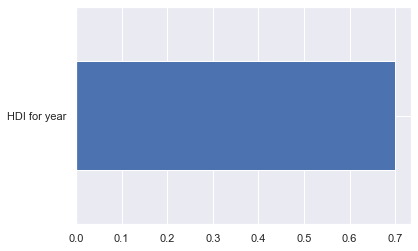

In [13]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh')

Delete the HDI for year column since it has many missing values

In [14]:
del df['HDI for year']

In [15]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country_year', ' gdp_for_year ($) ',
       'gdp_per_capita', 'generation'],
      dtype='object')

<span style='font-family:"Roboto"'> **Unique Countries**

In [16]:
countries =df.country.unique()
countries

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

<span style='font-family:"Roboto"'> **Age Count**

In [17]:
age_count = df.age
age_count

0        15-24 years
1        35-54 years
2        15-24 years
3          75+ years
4        25-34 years
            ...     
27815    35-54 years
27816      75+ years
27817     5-14 years
27818     5-14 years
27819    55-74 years
Name: age, Length: 27820, dtype: object

In [19]:
suicides_per_100k = (df['suicides/100k pop'].sum()) / len(df['suicides/100k pop'])
suicides_per_100k

12.816097411933864

<span style='font-family:"Roboto"'> Suicides per 100K population is approx 12.82

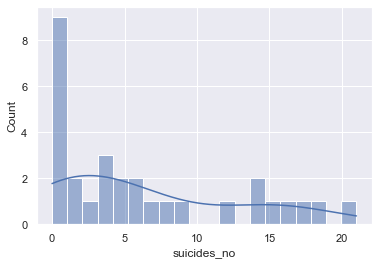

In [113]:
suicides_number  = df.suicides_no[:30]
sns.histplot(data = suicides_number, kde=True, bins = 20)
plt.show()

<span style='font-family:"Roboto"'> **Sex count**

In [21]:
sex_count = df.sex.value_counts()
sex_count

male      13910
female    13910
Name: sex, dtype: int64

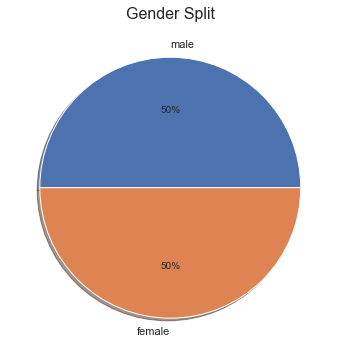

In [67]:
labels = ['male', 'female']
explode = (0.09,0)
plt.figure(figsize=(6,6))
plt.pie(sex_count, labels = labels,  autopct='%.0f%%', shadow=True)
plt.title("Gender Split", loc='center', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Suicide by Gender')

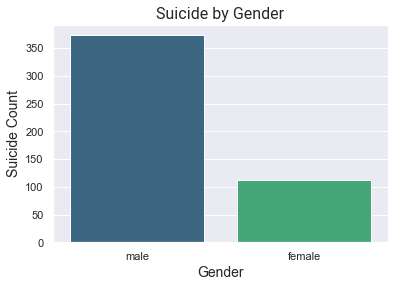

In [105]:
sns.barplot(x="sex", y="suicides_no", data=df, errorbar=None, palette='viridis')
plt.xlabel("Gender", fontsize = 14)
plt.ylabel("Suicide Count", fontsize = 14)
plt.title("Suicide by Gender", fontsize = 16,  font = 'Roboto')

Text(0.5, 1.0, 'Suicides per 100K population by Gender')

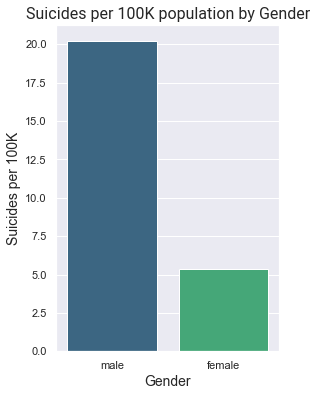

In [104]:
plt.figure(figsize=(4,6))
ax = sns.barplot(data=df, x='sex',  y='suicides/100k pop', errorbar=None, palette='viridis')
plt.xlabel("Gender", fontsize = 14)
plt.ylabel("Suicides per 100K", fontsize = 14)
plt.xticks(rotation=0)
# plt.xlim(0, )
plt.title("Suicides per 100K population by Gender", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide by Age')

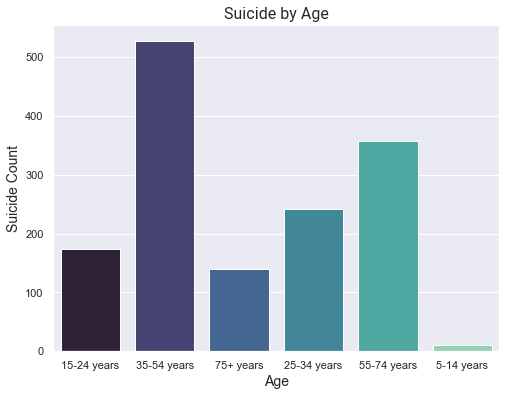

In [86]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='age', y="suicides_no", data=df, errorbar=None, palette='mako')
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Suicide Count", fontsize = 14)
plt.title("Suicide by Age", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide per 100K population by Age')

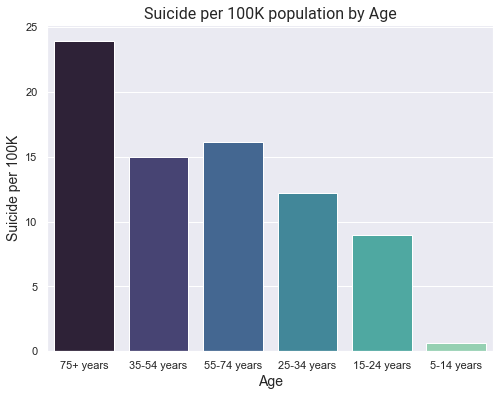

In [116]:
suicide_by_age = df[['age', 'suicides/100k pop']]
sorted_df=suicide_by_age.sort_values(by='suicides/100k pop',ascending=False)

plt.figure(figsize=(8,6))
ax = sns.barplot(x='age', y="suicides/100k pop", data=sorted_df, errorbar=None, palette='mako')
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Suicide per 100K", fontsize = 14)
plt.title("Suicide per 100K population by Age", fontsize = 16, font = 'Roboto')

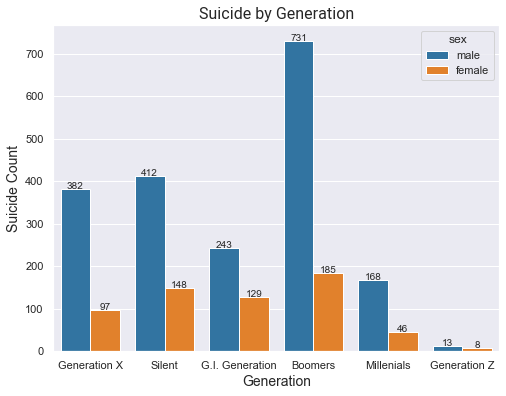

In [117]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='generation', hue='sex', y="suicides_no", data=df, errorbar=None, palette='tab10')
plt.xlabel("Generation", fontsize = 14)
plt.ylabel("Suicide Count", fontsize = 14)
plt.title("Suicide by Generation", fontsize = 16, font = 'Roboto')
# label each bar in histogram
for p in ax.patches:
     height = p.get_height() 
     ax.text(x = p.get_x()+(p.get_width()/2), 
     y = height+0.2, 
     s = '{:.0f}'.format(height),
     ha = 'center') # sets horizontal alignment (ha) to center

plt.show()

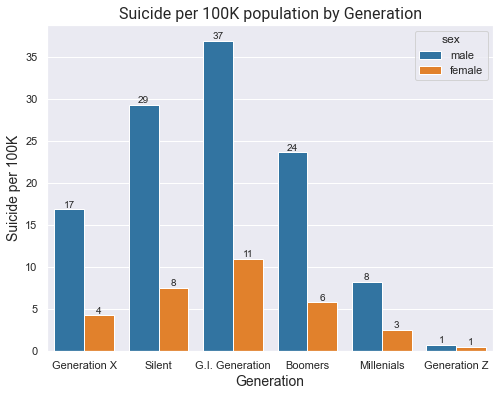

In [118]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='generation', hue='sex', y="suicides/100k pop", data=df, errorbar=None, palette='tab10')
plt.xlabel("Generation", fontsize = 14)
plt.ylabel("Suicide per 100K", fontsize = 14)
plt.title("Suicide per 100K population by Generation", fontsize = 16, font = 'Roboto')
# label each bar in histogram
for p in ax.patches:
     height = p.get_height() 
     ax.text(x = p.get_x()+(p.get_width()/2), 
     y = height+0.2, 
     s = '{:.0f}'.format(height),
     ha = 'center') # sets horizontal alignment (ha) to center

plt.show()

Text(0.5, 1.0, 'Total number of suicides 1985 - 2016')

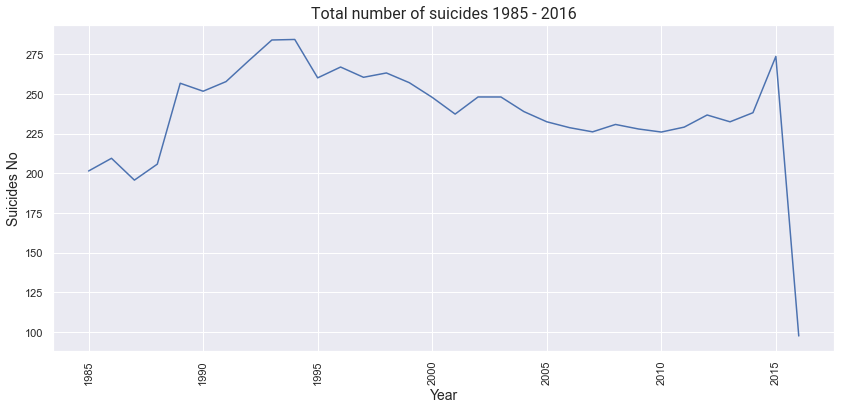

In [108]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=df, x='year',y='suicides_no', errorbar=None,)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Suicides No", fontsize = 14)
plt.xticks(rotation=90)
# plt.xlim(0, )
plt.title("Total number of suicides 1985 - 2016", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Total number of suicides per 100K population 1985 - 2016')

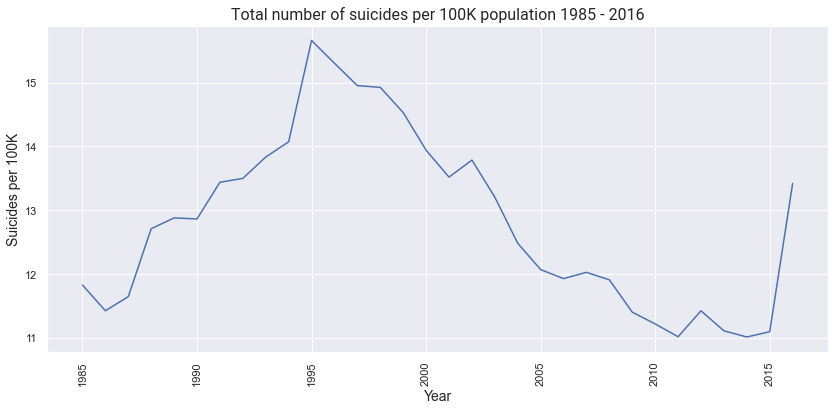

In [30]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=df, x='year',y='suicides/100k pop', errorbar=None)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Suicides per 100K", fontsize = 14)
plt.xticks(rotation=0)
# plt.xlim(0, )
plt.title("Total number of suicides per 100K population 1985 - 2016", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide by Year and Gender')

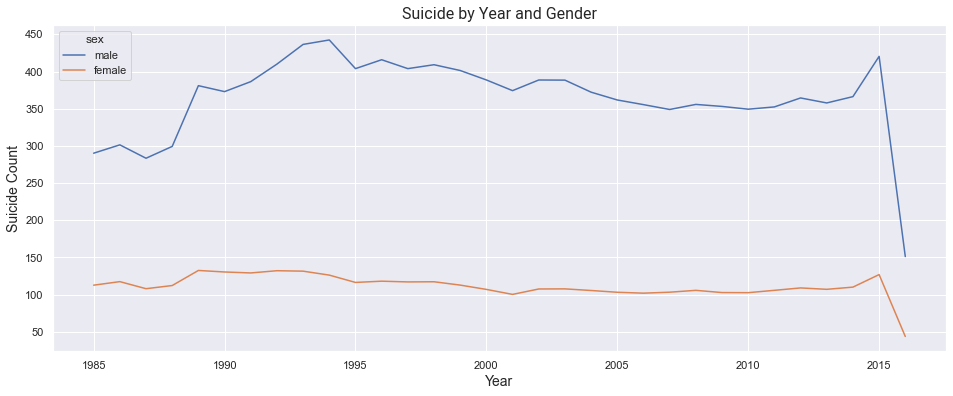

In [31]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='year', hue='sex', y="suicides_no", data=df, errorbar=None)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Suicide Count", fontsize = 14)
plt.title("Suicide by Year and Gender", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide per 100K by Year and Gender')

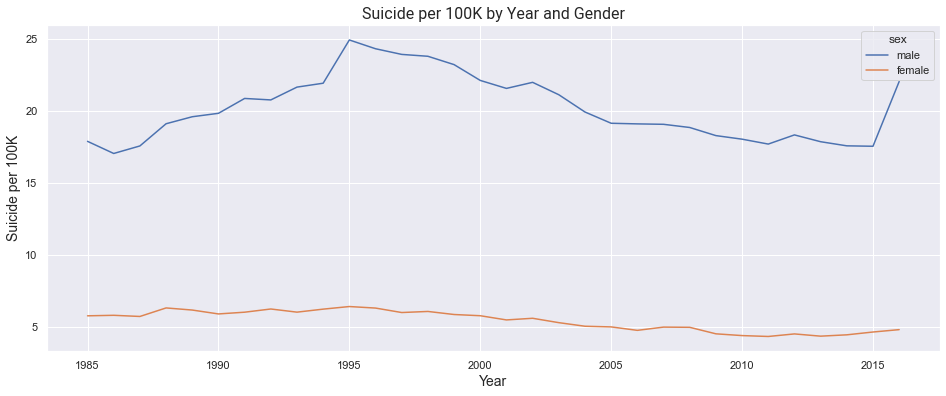

In [32]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='year', hue='sex', y="suicides/100k pop", data=df, errorbar=None)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Suicide per 100K", fontsize = 14)
plt.title("Suicide per 100K by Year and Gender", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide by Year and Age')

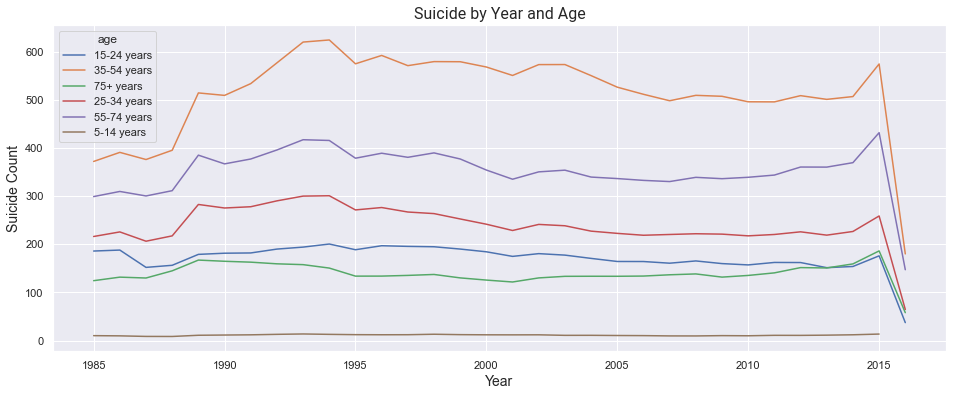

In [97]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='year', hue='age', y="suicides_no", data=df, errorbar=None)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Suicide Count", fontsize = 14)
plt.title("Suicide by Year and Age", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide per 100K by Year and Age')

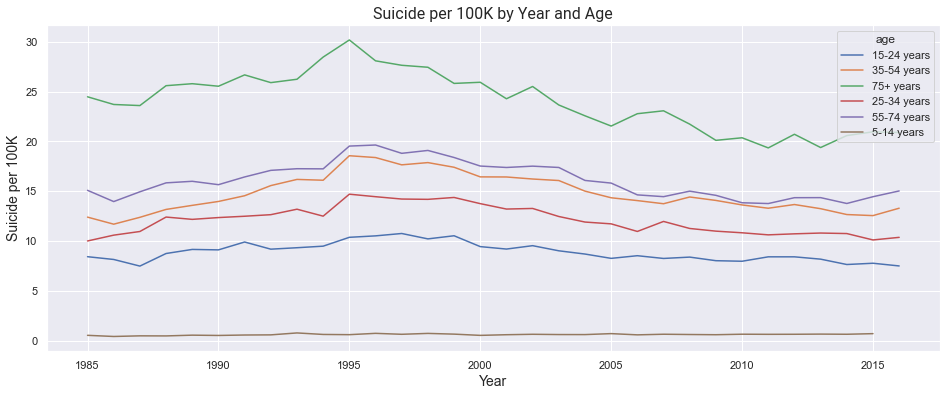

In [34]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='year', hue='age', y="suicides/100k pop", data=df, errorbar=None)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Suicide per 100K", fontsize = 14)
plt.title("Suicide per 100K by Year and Age", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide by Year and Generation')

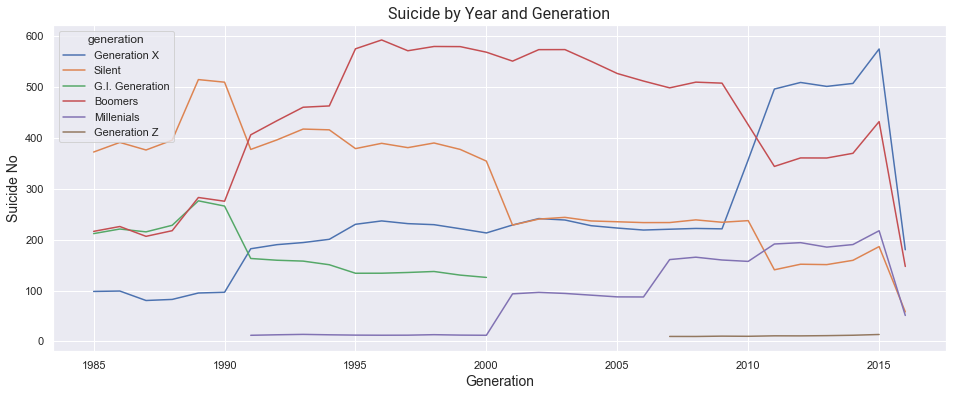

In [35]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='year', hue='generation', y="suicides_no", data=df, errorbar=None)
plt.xlabel("Generation", fontsize = 14)
plt.ylabel("Suicide No", fontsize = 14)
plt.title("Suicide by Year and Generation", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide per 100K by Year and Age')

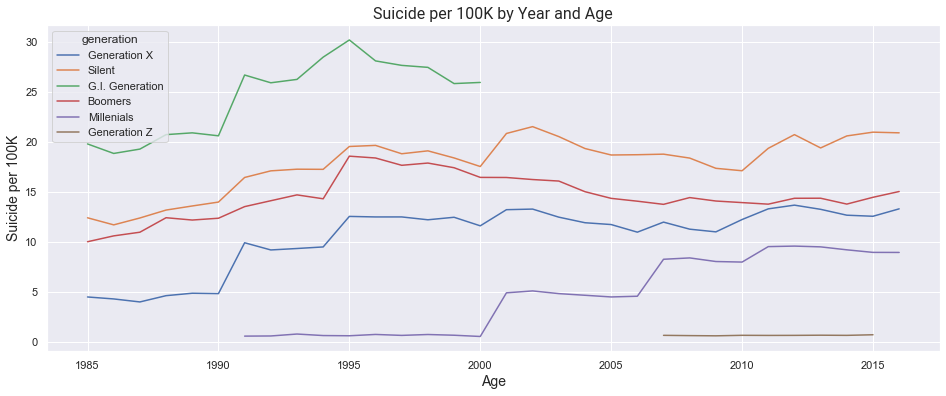

In [36]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='year', hue='generation', y="suicides/100k pop", data=df, errorbar=None)
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Suicide per 100K", fontsize = 14)
plt.title("Suicide per 100K by Year and Age", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Population by Country')

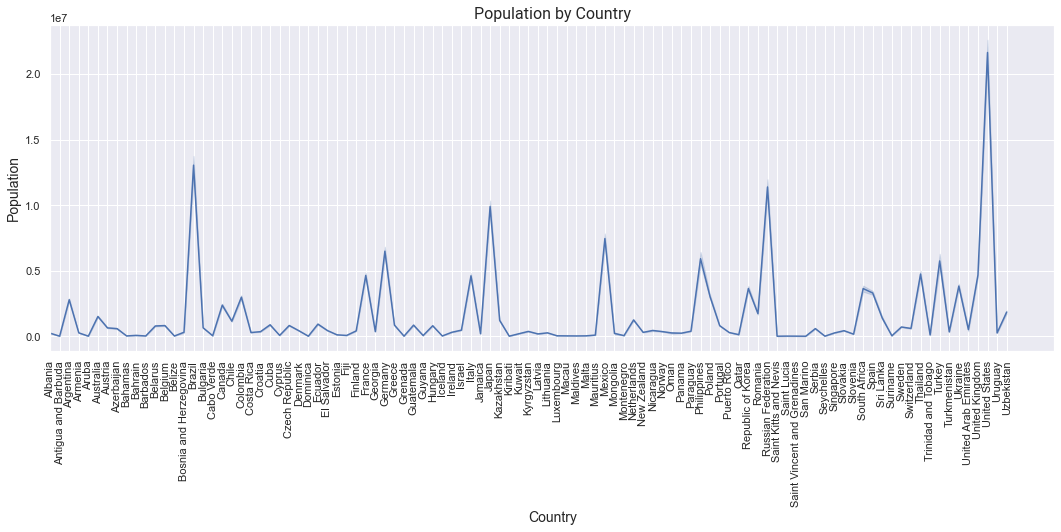

In [102]:
plt.figure(figsize=(18,6))
ax = sns.lineplot(data=df, x='country',  y="population")
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Population", fontsize = 14)
plt.xticks(rotation=90)
plt.xlim(0, )
plt.title("Population by Country", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicides by Country')

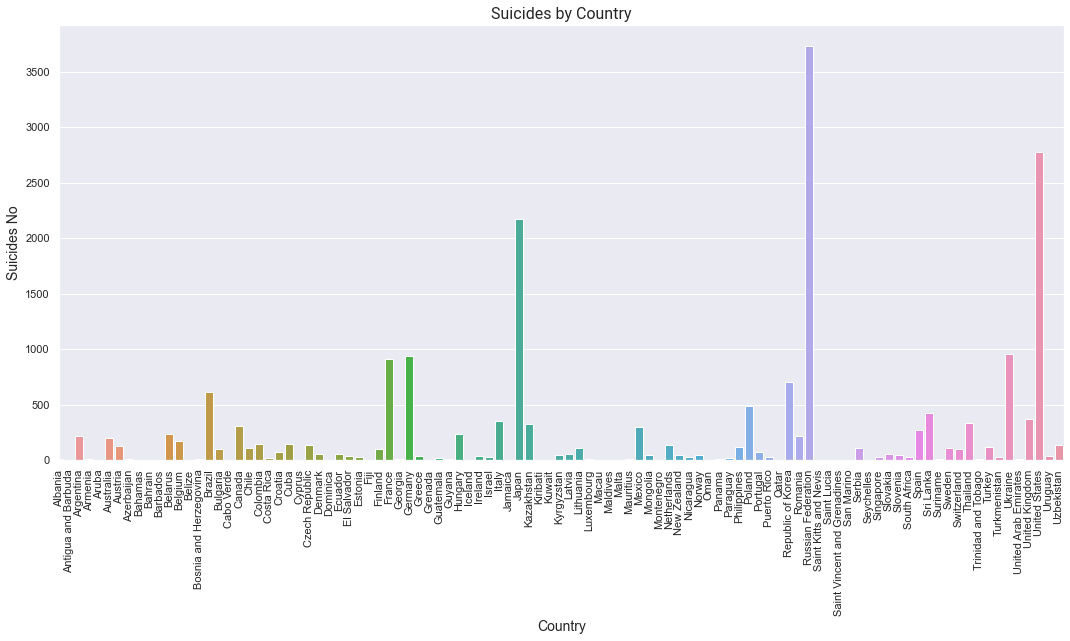

In [38]:
plt.figure(figsize=(18,8))
ax = sns.barplot(data=df, x='country',  y='suicides_no', errorbar=None)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Suicides No", fontsize = 14)
plt.xticks(rotation=90)
plt.xlim(0, )
plt.title("Suicides by Country", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicides per 100K by Country')

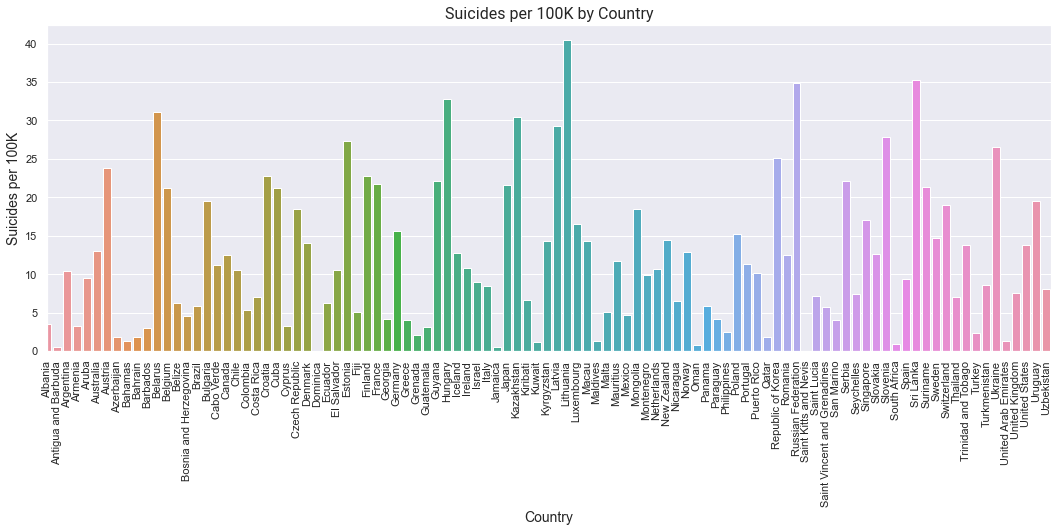

In [39]:
plt.figure(figsize=(18,6))
ax = sns.barplot(data=df, x='country',  y='suicides/100k pop', errorbar=None)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Suicides per 100K", fontsize = 14)
plt.xticks(rotation=90)
plt.xlim(0, )
plt.title("Suicides per 100K by Country", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide by Country and Gender')

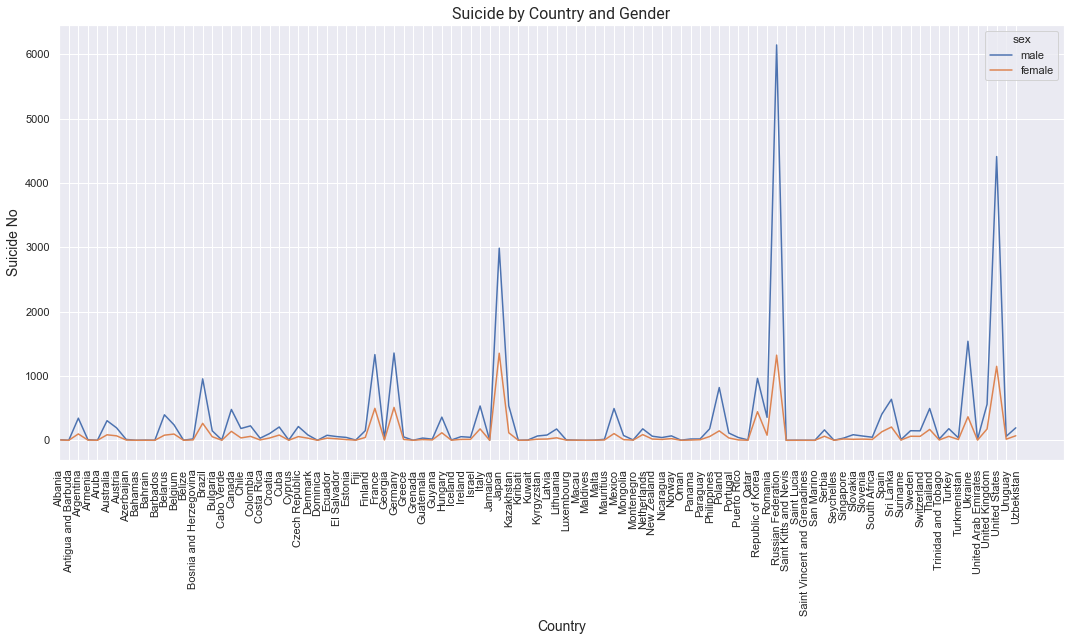

In [40]:
plt.figure(figsize=(18,8))
ax = sns.lineplot(x='country', hue='sex', y="suicides_no", data=df, errorbar=None)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Suicide No", fontsize = 14)
plt.xticks(rotation=90)
plt.xlim(0, )
plt.title("Suicide by Country and Gender", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide per 100K by Country and Gender')

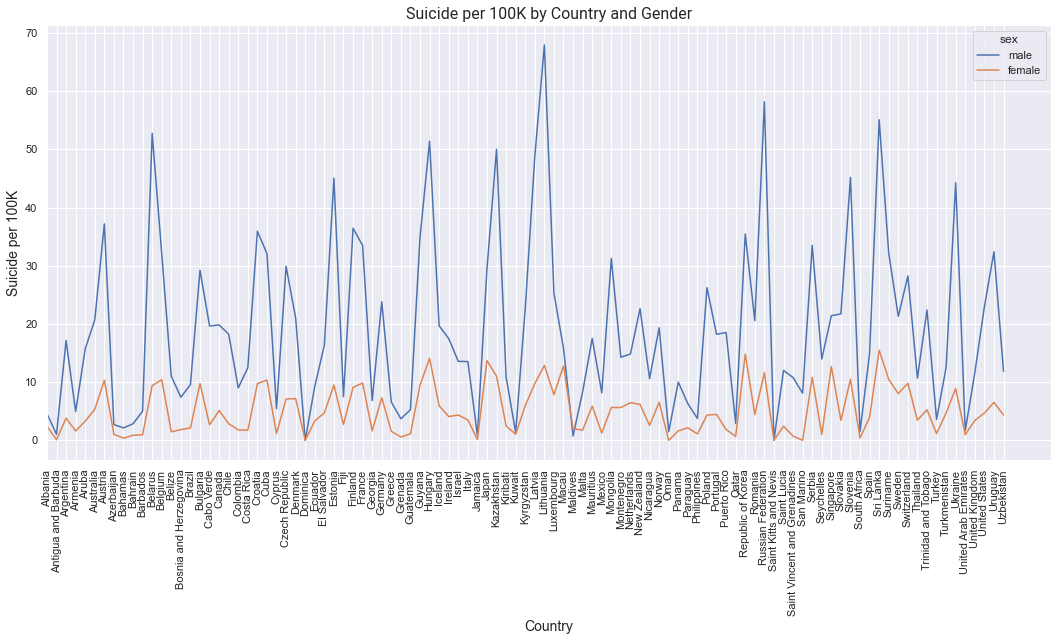

In [41]:
plt.figure(figsize=(18,8))
ax = sns.lineplot(x='country', hue='sex', y="suicides/100k pop", data=df, errorbar=None)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Suicide per 100K", fontsize = 14)
plt.xticks(rotation=90)
plt.xlim(0, )
plt.title("Suicide per 100K by Country and Gender", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide by Country and Generation')

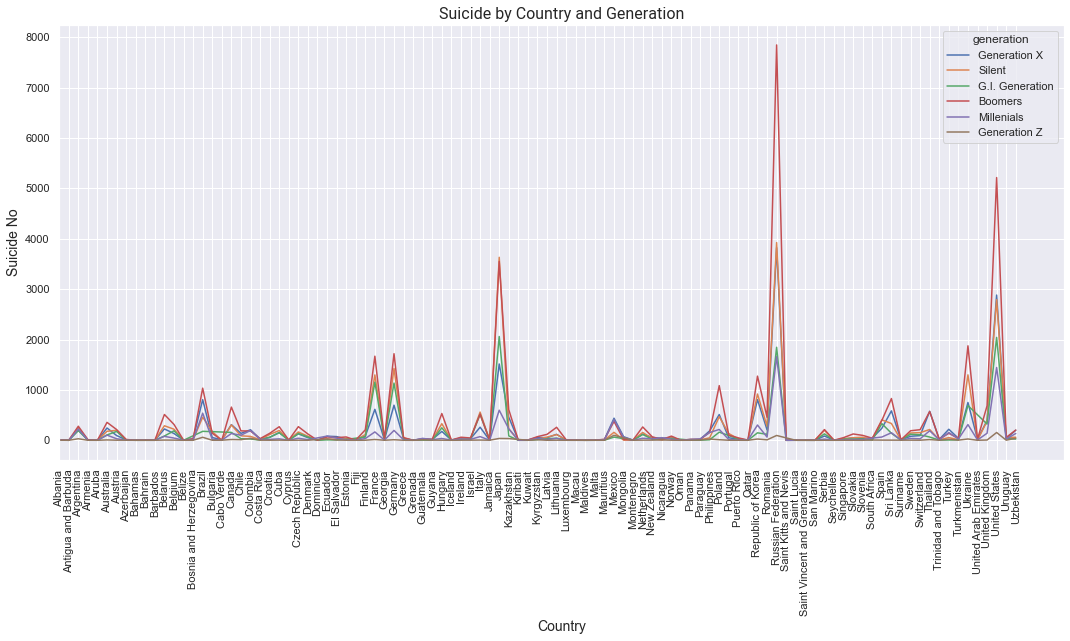

In [42]:
plt.figure(figsize=(18,8))
ax = sns.lineplot(x='country', hue='generation', y="suicides_no", data=df, errorbar=None)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Suicide No", fontsize = 14)
plt.xticks(rotation=90)
plt.xlim(0, )
plt.title("Suicide by Country and Generation", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide per 100K by Country and Generation')

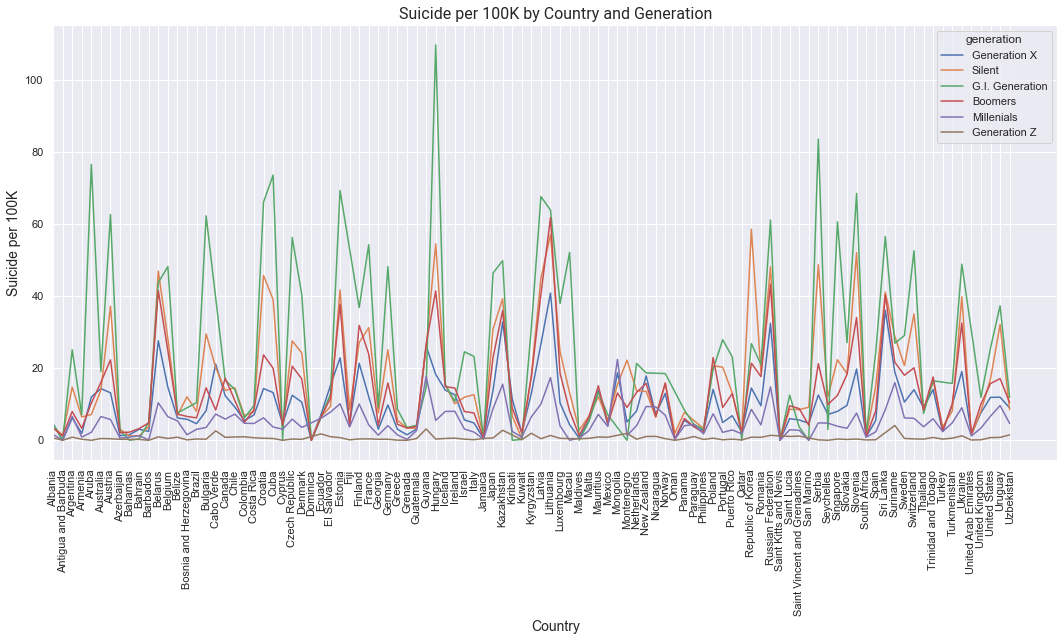

In [43]:
plt.figure(figsize=(18,8))
ax = sns.lineplot(x='country', hue='generation', y="suicides/100k pop", data=df, errorbar=None)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Suicide per 100K", fontsize = 14)
plt.xticks(rotation=90)
plt.xlim(0, )
plt.title("Suicide per 100K by Country and Generation", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide by Country and Age')

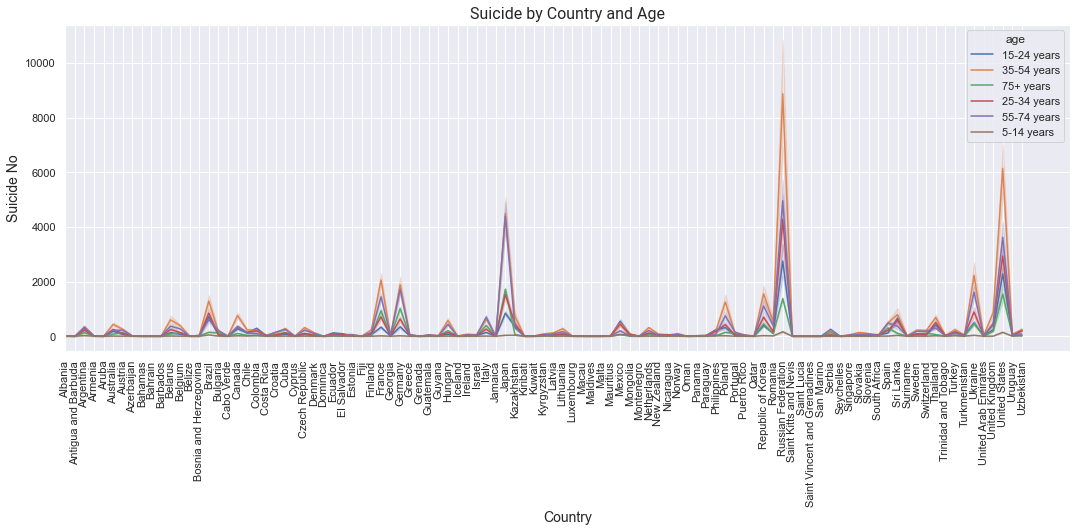

In [44]:
plt.figure(figsize=(18,6))
ax = sns.lineplot(x='country', hue='age', y="suicides_no", data=df)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Suicide No", fontsize = 14)
plt.xticks(rotation=90)
plt.xlim(0, )
plt.title("Suicide by Country and Age", fontsize = 16, font = 'Roboto')

Text(0.5, 1.0, 'Suicide per 100K by Country and Age')

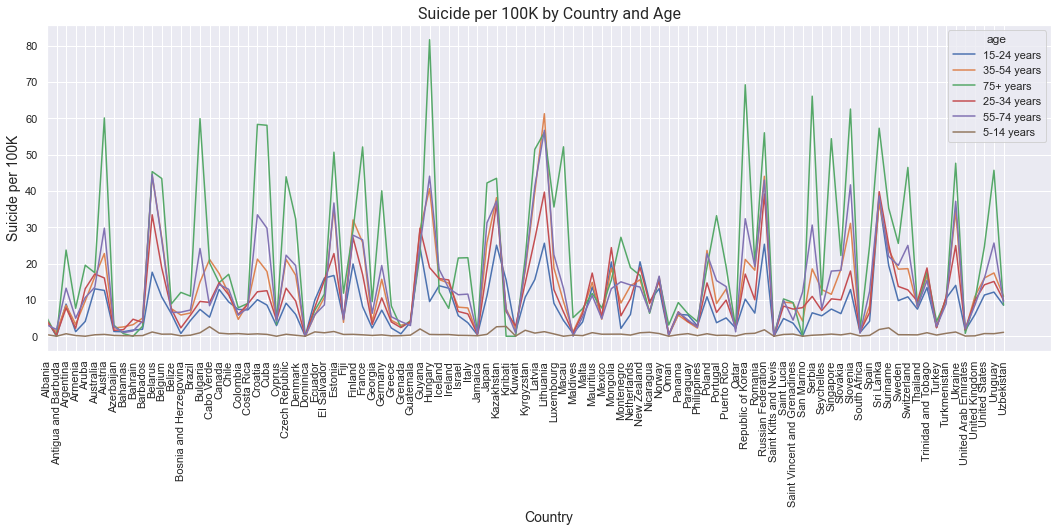

In [45]:
plt.figure(figsize=(18,6))
ax = sns.lineplot(x='country', hue='age', y="suicides/100k pop", data=df, errorbar=None)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Suicide per 100K", fontsize = 14)
plt.xticks(rotation=90)
plt.xlim(0, )
plt.title("Suicide per 100K by Country and Age", fontsize = 16, font = 'Roboto')

### <span style='font-family:"Roboto"'> **Conclusion**

* Suicides per 100K population is approximately **12.82**
* There has been an equal gender distribution
* Suicide rate per 100K population between 1985 - 2016 was highest among males than females. Russian federation has the highest total male suicides.
* Suicides per 100K population increase with age
* Suicide rate is highest among Boomers.
* Suicides per 100K population peaked in 1995, dropping significantly between 1995 and 2015
* Russian Federation and United States account for highest number of suicides. United States, also with highest population is the second highest in total suicide count.